In [2]:
import numpy as np
from image_to_poem.similarity.similarity_scoring import BertSimilarityModel
from image_to_poem.data.prep_data import load_json_file
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

In [2]:
losses = np.loadtxt("../models/similarity/model_20231129_221129/loss.txt")
val_losses = np.loadtxt("../models/similarity/model_20231129_221129/val_loss.txt")
num_epochs = 5
# len_trainloader = 

In [7]:
dp = len(losses)//num_epochs
epoch_losses = [np.mean(losses[i*dp:(i+1)*dp]) for i in range(num_epochs)]

In [24]:
N = 25
smooth_losses = np.convolve(losses, np.ones(N)/N, mode='same')

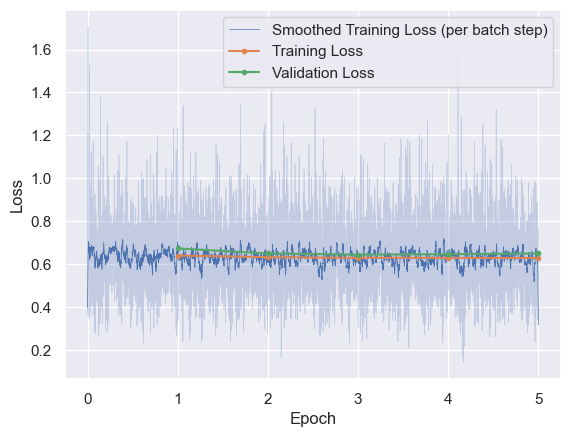

In [26]:
plt.figure()
plt.plot(np.linspace(0,5,len(losses)), losses, "-", alpha=0.25, linewidth=0.5)
plt.plot(np.linspace(0,5,len(losses)), smooth_losses, "-b", linewidth=0.5, label="Smoothed Training Loss (per batch step)")
plt.plot(np.arange(5)+1, epoch_losses, ".-", linewidth=1.5, label="Training Loss")
if len(val_losses) > 0:
    plt.plot(np.arange(5)+1,val_losses, ".-", linewidth=1.5, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [3]:
data = load_json_file("../data/caption_poem.json")
sim_model = BertSimilarityModel.from_model_dir("../models/similarity/model_20231129_221129")

In [8]:
p = data[0]["poem"]
c = data[0]["caption"]
print(c)
print()
print(p)


two pink flowers in a flower pot 

what is lovely never dies
but passes into other loveliness
star-dust or sea-foam flower or winged air


In [26]:
inp = sim_model.encode_input(c,p)
ids = inp["input_ids"].numpy()
toks = sim_model.tokenizer.convert_ids_to_tokens(ids[0])
print(toks)

['[CLS]', 'two', 'pink', 'flowers', 'in', 'a', 'flower', 'pot', '[SEP]', 'what', 'is', 'lovely', 'never', 'dies', 'but', 'passes', 'into', 'other', 'love', '##liness', 'star', '-', 'dust', 'or', 'sea', '-', 'foam', 'flower', 'or', 'winged', 'air', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD